In [1]:
# Para resetear el workspace
%reset -f

In [2]:
## Manejo de la base de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Extraccion de los datos del excel
excel_archive = 'regression_dataset.xlsx'       # Nombre del archivo por leer
excel_data = pd.ExcelFile(excel_archive)        # Lectura del archivo de Excel
trainset = excel_data.parse('Training', header = None, skiprows = 1, usecols = "A:K")
testset  = excel_data.parse('Validation', header = None, skiprows = 1, usecols = "A:K")

# Extraccion de las variables de entrada y de las salidas
f = trainset.iloc[:, 0:10]                      # Variables de entrada
r = trainset.iloc[:, 10]                        # Variables de salida
test = testset.iloc[:, 0:10]                    # Variables de prueba
r_test = testset.iloc[:, 10]                    # Etiquetas verdaderas de los valores de prueba

# Tranformar las variables a Arrays (Pandas trabaja con DataFrames)
f = f.to_numpy()
r = r.to_numpy()
test = test.to_numpy()
r_test = r_test.to_numpy()

FileNotFoundError: [Errno 2] No such file or directory: 'regression_dataset.xlsx'

### Ordinary Least Square - Solución analítica Vs. SciKit-Learn

Solución analitica para los parametros: $\hat{w}=\left(\mathbf{x}^T\mathbf{x}\right)^{-1}\mathbf{x}^T\mathbf{r}$

In [ ]:
# Creacion de X
n = f.shape[0]                                  # Cantidad de elementos presentes
X = np.hstack((np.ones((n, 1)), f))             # Reescribiendo el formato de X1 para la aplicacion de regresion

# Aplicacion de la solucion analitica de regresion
X_T = X.T                                       # Transpuesta de X
first_term = np.linalg.inv(X_T @ X)             # Multiplicacion de la transpuesta por la matriz X
second_term = X_T @ r                           # Multiplicacion de la transpuesta de X con las salidas
W = first_term @ second_term                    # Matriz de coeficientes

print(f"Coeficientes de la regresion: \n{W}")

Coeficientes de la regresion: 
[ 9.53592157  0.8741684  -2.10112381 -5.49898839 -2.57928753  2.69730568
 -1.14191437  1.17926097 -4.64136887  4.68581772  3.20065081]


Solución analítica para la regresión: $\mathbf{r}=\mathbf{x}w$

In [ ]:
# Creacion de X de prueba
n_test = f.shape[0]                              # Cantidad de elementos presentes
X_test = np.hstack((np.ones((n_test, 1)), test)) # Reescribiendo el formato de X1 para la aplicacion de regresion

# Evaluación del desempeño
r_predicts = X_test @ W

In [ ]:
## Verificacion de aciertos
# Se redondean los terminos de las predicciones y las etiquetas

MSE = mean_squared_error(r_predicts, r_test) * 100
# Forma matricial de la varianza (o algo asi)

print(f"Error cuadrático medio (solución analítica): {MSE}")

Error cuadrático medio (solución analítica): 8.79872344332103e-06


In [ ]:
## Aplicacion con los paquetes de SciKit-Learn
# Ordinary Least Squares
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

reg_model = LinearRegression().fit(X, r)            # Creacion del modelo lineal
W0_OLS = reg_model.intercept_                      # Intercepto del modelo
W_OLS = reg_model.coef_                             # Matriz de coeficientes, no incluye el intercepto
W_OLS.shape
W_OLS[0] = W0_OLS                                   # Añadiendo el intercepto a la matriz

r_OLS = X_test @ W_OLS                              # Aplicando la ecuación

print(f"Coeficientes de la regresion (OLS) \n {W_OLS}\n")

MSE_OLS = mean_squared_error(r_OLS, r_test) * 100

print(f"Error cuádratico medio (OLS): {MSE_OLS}")

Coeficientes de la regresion (OLS) 
 [ 9.5358993   0.87416608 -2.10112036 -5.49898887 -2.57929218  2.69730897
 -1.14191387  1.17927428 -4.64136521  4.68579891  3.20066789]

Error cuádratico medio (OLS): 8.814288427137848e-06


In [ ]:
## Similtud entre la solucion analitica y OLS de SciKit-Learn
W_round = np.round(W, decimals = 10)
W_OLS_round = np.round(W, decimals = 10)
# El porcentaje de error depende del redondeo

validation = (np.sum(W_round == W_OLS_round)/W_round.size) * 100
print(f"El resultado analitico es similar al de la libreria en un {validation}%")

El resultado analitico es similar al de la libreria en un 100.0%


### Ridge Regression y Lasso Regression - SciKit Learn

**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge                          # Libreria del Ridge Regression en SciKit-Learn
from sklearn.linear_model import Lasso                          # Libreia de Lasso de SciKit-Learn

# Definicion de los valores de Lambda para las funciones de penalizacion
λ_values = np.arange(0, 1000, 1)                                # Valores de lambda a probar

In [ ]:
## Ridge Regression
n_ridge = f.shape[0]                                            # Numero de features presentes
X_ridge = np.hstack((np.ones((n_ridge, 1)), f))                 # Creacion del training

# Para guardar el MSE
MSE_RR = []
i = 0

for λ in λ_values:
    ridge_model = Ridge(alpha = λ)                              # Se realiza el modelo en base a lambda
    ridge_model.fit(X_ridge, r)                                 # Se crea el modelo
    
    W0_RR = ridge_model.intercept_                              # Intercepto
    W_RR = ridge_model.coef_                                    # Parametros
    W_RR[0] = W0_RR
    
    r_RR = X_test @ W_RR                                        # Se evalua
    
    print(f"Coeficientes para λ = {λ}\n{W_RR}\n")
    
    MSE_RR.append(mean_squared_error(r_RR, r_test) * 100)
    print(f"Error cuádratico medio  λ = {λ}: {MSE_RR[i]}\n")
    print("---")
    
    i = i + 1
    

Coeficientes para λ = 0
[ 9.5358993   0.87416608 -2.10112036 -5.49898887 -2.57929218  2.69730897
 -1.14191387  1.17927428 -4.64136521  4.68579891  3.20066789]

Error cuádratico medio  λ = 0: 8.814288427139847e-06

---
Coeficientes para λ = 1
[ 9.26351256  0.61495609 -2.2771305  -4.60147322 -2.48404293  2.648527
 -0.76533712  1.40714003 -4.49962644  4.07002476  3.02449638]

Error cuádratico medio  λ = 1: 1.5514647338340195

---
Coeficientes para λ = 2
[ 9.21955853  0.6295044  -2.11871649 -4.22013626 -2.37927468  2.54210266
 -0.71523112  1.45003559 -4.17582629  3.74229668  2.64632808]

Error cuádratico medio  λ = 2: 5.189299929711049

---
Coeficientes para λ = 3
[ 9.18365122  0.63960458 -1.98431164 -3.89926733 -2.28776159  2.44887809
 -0.67265876  1.48076951 -3.90182931  3.46645469  2.33268017]

Error cuádratico medio  λ = 3: 9.916020273974013

---
Coeficientes para λ = 4
[ 9.15395567  0.64635105 -1.86863397 -3.62541911 -2.20671142  2.36609087
 -0.63595812  1.50230806 -3.6666256   3.2309

Se puede apreciar que mientras mayor sea el valor de Lambda, mas alto se tendra el MSE. Es decir, mayor sera la carga con la que los datos se penalizan.

<function matplotlib.pyplot.show(close=None, block=None)>

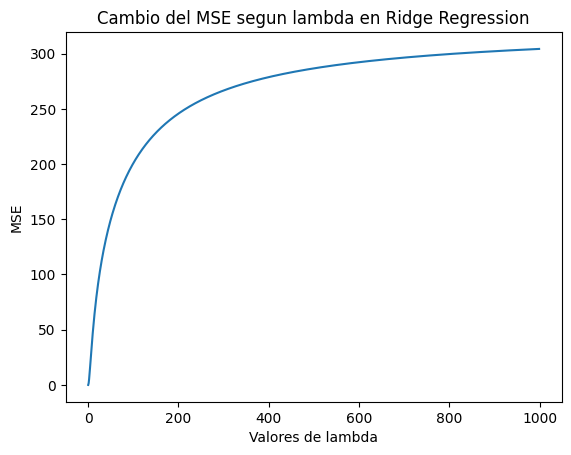

In [ ]:
import matplotlib.pyplot as plt
plt.plot(λ_values, MSE_RR)

plt.xlabel('Valores de lambda')
plt.ylabel('MSE')
plt.title('Cambio del MSE segun lambda en Ridge Regression')

plt.show

**Lasso Regression**

In [ ]:
## Lasso Regression
n_lasso = f.shape[0]                                            # Numero de lados
X_lasso = np.hstack((np.ones((n_lasso, 1)), f))                 # Features de Lasso
MSE_LR = []
i = 0

for λ in λ_values:
    lasso_model = Lasso(alpha = λ)                              # Creacion del modelo de regresion en base a lambda
    lasso_model.fit(X_lasso, r)                                 # Creación del modelo con la data de training
    
    W0_LR = lasso_model.intercept_
    W_LR = lasso_model.coef_
    W_LR[0] = W0_LR
    
    r_LR = X_test @ W_LR
    print(f"Coeficientes para λ = {λ}\n{W_LR}\n")
    
    MSE_LR.append(mean_squared_error(r_LR, r_test) * 100)
    print(f"Error cuádratico medio  λ = {λ}: {MSE_LR[i]}\n")
    print("---")
    
    i = i + 1

c:\Users\Guillermo Antonio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Guillermo Antonio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Coeficientes para λ = 0
[ 9.0027399  -2.71690231 -5.53565747 -2.45920498  4.47904284  8.11491044
 -1.95036129 -0.16992823 -7.46218598  6.35171148  0.98510114]

Error cuádratico medio  λ = 0: 0.0001407442708279731

---
Coeficientes para λ = 1
[ 9.59458  0.      -0.      -0.      -0.       0.      -0.       0.
 -0.       0.      -0.     ]

Error cuádratico medio  λ = 1: 325.06002717760003

---
Coeficientes para λ = 2
[ 9.59458  0.      -0.      -0.      -0.       0.      -0.       0.
 -0.       0.      -0.     ]

Error cuádratico medio  λ = 2: 325.06002717760003

---
Coeficientes para λ = 3
[ 9.59458  0.      -0.      -0.      -0.       0.      -0.       0.
 -0.       0.      -0.     ]

Error cuádratico medio  λ = 3: 325.06002717760003

---
Coeficientes para λ = 4
[ 9.59458  0.      -0.      -0.      -0.       0.      -0.       0.
 -0.       0.      -0.     ]

Error cuádratico medio  λ = 4: 325.06002717760003

---
Coeficientes para λ = 5
[ 9.59458  0.      -0.      -0.      -0.       0. 

<function matplotlib.pyplot.show(close=None, block=None)>

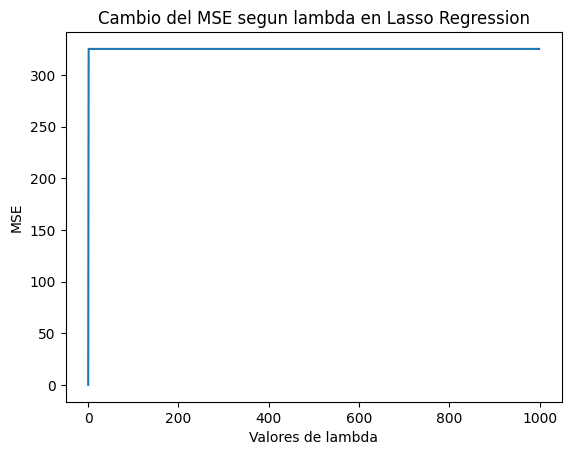

In [ ]:
plt.plot(λ_values, MSE_LR)

plt.xlabel('Valores de lambda')
plt.ylabel('MSE')
plt.title('Cambio del MSE segun lambda en Lasso Regression')

plt.show

### Reducción de dimensionalidad con PCA

In [ ]:
## Aplicación de PCA de forma manual
# Normalización de la data con respecto a la media
norm_X = (f - np.mean(f, axis = 0))/np.std(f, axis = 0)  # Axis = 0 es que el calculo se realiza a lo largo de las columnas

# Calculo de la matriz de covarianza
cov_X = np.cov(norm_X, rowvar = False)

# Calculo de los eigenvalues y eigenvectors de la matriz de covarianza
eigenvalues_X, eigenvectors_X = np.linalg.eig(cov_X)

# Reorganización descendente de los eigenvectores y los eigenvalores
idx = eigenvalues_X.argsort()[::-1]                    # Organiza la data de forma descendente
eigenvalues_X = eigenvalues_X[idx]
eigenvectors_X = eigenvectors_X[:, idx]

# Se saca la "Varianza explicada" para conocer el peso que tiene cada PC en el calculo de la varianza
# Cada columna representa un feature
EV_X = np.cumsum(eigenvalues_X) / np.sum(eigenvalues_X) # cumsum es la suma acumulativa

# Se saca el numero de PC (Principal Components) segun su aporte en la "varianza explicada"
# Se tendran tantos PC segun los features que se tengan, solo que algunas aportan mas a la varianza de los datos que otros
n_PC = np.argmax(EV_X >= 0.9) + 1                       # Devuelve el indice del elemento que cumpla la condicion      

# Extraccion de los PC (Principal Components)
PC = eigenvectors_X[:, :n_PC]
print(f"Valores para los PC: \n{PC}")

Valores para los PC: 
[[ 0.34076508  0.17188263]
 [ 0.3228495  -0.00073664]
 [ 0.32502291  0.04147207]
 [ 0.28460098 -0.53825368]
 [ 0.29879326  0.49097355]
 [ 0.31644464 -0.19233726]
 [ 0.28197621  0.48218598]
 [ 0.32086781 -0.32486703]
 [ 0.34173064  0.1080921 ]
 [ 0.32303029 -0.22637228]]


In [ ]:
## Transformacion de los features al nuevo espacio de los PC
PC_X = norm_X @ PC                      # Nuevos features por usar

## Aplicacion del PCA a el test data
norm_X_test = (test - np.mean(test, axis = 0))/np.std(test, axis = 0)
PC_X_test = norm_X_test @ PC                 # Se usan los mismos PC que con el training set para que esten en un mismo "Espacio"

In [ ]:
## Aplicacion de OLS para los PC
reg_model = LinearRegression().fit(PC_X, r)            # Creacion del modelo lineal

PC_W0_OLS = reg_model.intercept_                       # Intercepto del modelo
PC_W_OLS = reg_model.coef_                             # Matriz de coeficientes, no incluye el intercepto

PC_W_OLS[0] = PC_W0_OLS                                # Añadiendo el intercepto a la matriz

PC_r_OLS = PC_X_test @ PC_W_OLS                        # Aplicando la ecuación